In [142]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


colors = [
    '#1f77b4',  # Blue
    '#2ca02c',  # Green
    '#ff7f0e',  # Orange
    '#d62728',  # Red
    '#9467bd',  # Purple
    '#8c564b',  # Brown
    '#e377c2',  # Pink
    '#7f7f7f',  # Gray
    '#bcbd22',  # Yellow-green
    '#17becf',  # Cyan
    '#1a55FF',  # Light Blue
]

def plot_experiment(vals, xlabel, ylabel, title, pad_value=None, smoothing=None, figsize = (12,8)):
  print('plotting!')
  plt.style.use('seaborn-v0_8-whitegrid')
  fig, ax = plt.subplots(figsize=figsize, dpi=300)
  # Set font family to serif for the plot
  plt.rcParams['font.family'] = 'serif'
  
  # Title and axis labels
  ax.set_title(title, fontsize=24, pad=20, family='serif')
  ax.set_xlabel(xlabel, fontsize=20 , labelpad=15, family='serif')
  ax.set_ylabel(ylabel, fontsize=20, labelpad=15, family='serif')

  # Tick parameters
  ax.tick_params(axis='both', which='major', labelsize=16, pad=8)

  # # X-axis formatting
  # ax.xaxis.set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: f'{x/1e9:.1f}'))
  # ax.set_xlim(0, 1e10)

  # Grid and spines
  ax.grid(True, linestyle='--', alpha=0.7, color='#E0E0E0')
  ax.spines['top'].set_visible(False)
  ax.spines['right'].set_visible(False)
  ax.spines['left'].set_linewidth(1.5)
  ax.spines['bottom'].set_linewidth(1.5)
  plt.rcParams['font.family'] = 'serif'

  # rcparams = {
  #     'axes.titlesize': 24,
  #     'axes.labelsize': 22,
  #     'legend.fontsize': 22,
  #     'lines.linewidth': 2,
  #     'xtick.labelsize': 18,
  #     'ytick.labelsize': 18,
  # }
  # matplotlib.rcParams.update(rcparams)

  maxlen = 0
  for  v in vals.values():
    maxlen = max(maxlen, *[len(l) for l in v])

  for idx, (key, losses) in enumerate(vals.items()):
    # some nonsense because i do early stopping
    if pad_value is not None:
      l_padded = []
      for l in losses:
        oldlen = len(l) #- np.argmax(l[::-1])
        if oldlen < maxlen:
          # print('padding!', oldlen, maxlen)
          l = np.pad(l, (0, maxlen - len(l)))
          l[oldlen:] = pad_value
        l_padded.append(l)
      l = np.stack(l_padded)
    else:
      l = np.stack(losses)

    ts = np.arange(l.shape[-1])
    mean = np.nanmean(l, axis=0)
    std = np.nanstd(l, axis=0)
    sns.lineplot(x=ts, y=mean, ax=ax, alpha = 0.2, color = colors[idx])
    if smoothing is not None:
      mean = np.convolve(mean, np.ones((smoothing,)) / smoothing)[smoothing:-smoothing]
      std = np.convolve(std ** 2, np.ones((smoothing,)) / (smoothing ** 2))[smoothing:-smoothing] ** 0.5
      ts = ts[smoothing:smoothing+len(mean)]
      sns.lineplot(x=ts, y=mean, ax=ax, color = colors[idx], label = f"{key}")
    # sns.lineplot(x=ts, y=mean, ax=ax)
    # ax.plot(ts, mean, label=key)
    if len(l) > 1:
      ax.fill_between(ts, mean - 1.96 * std, mean + 1.96 * std, alpha=0.2)
  plt.tight_layout()
  return ax

In [143]:
import json
with open('llama_baseline.json') as f:
    llama_dict = json.load(f)
with open('r1_baseline.json') as f:
    r1_dict = json.load(f)
import json
with open('qwen_baseline.json') as f:
    qwen_dict = json.load(f)


In [144]:
def get_rewards(dic):
    return np.array([[item['rewards/correctness_reward_func'] for item in dic['log_history']]])

def get_mi(dic):
    return np.array([[item['rewards/mi_reward'] for item in dic['log_history']]])

def get_smi(dic):
    return np.array([[item['rewards/semantic_mi_reward'] for item in dic['log_history']]])

In [145]:
losses = {'LLaMa': get_rewards(llama_dict),
          'R1': get_rewards(r1_dict),
          'Qwen': get_rewards(qwen_dict)}

plotting!


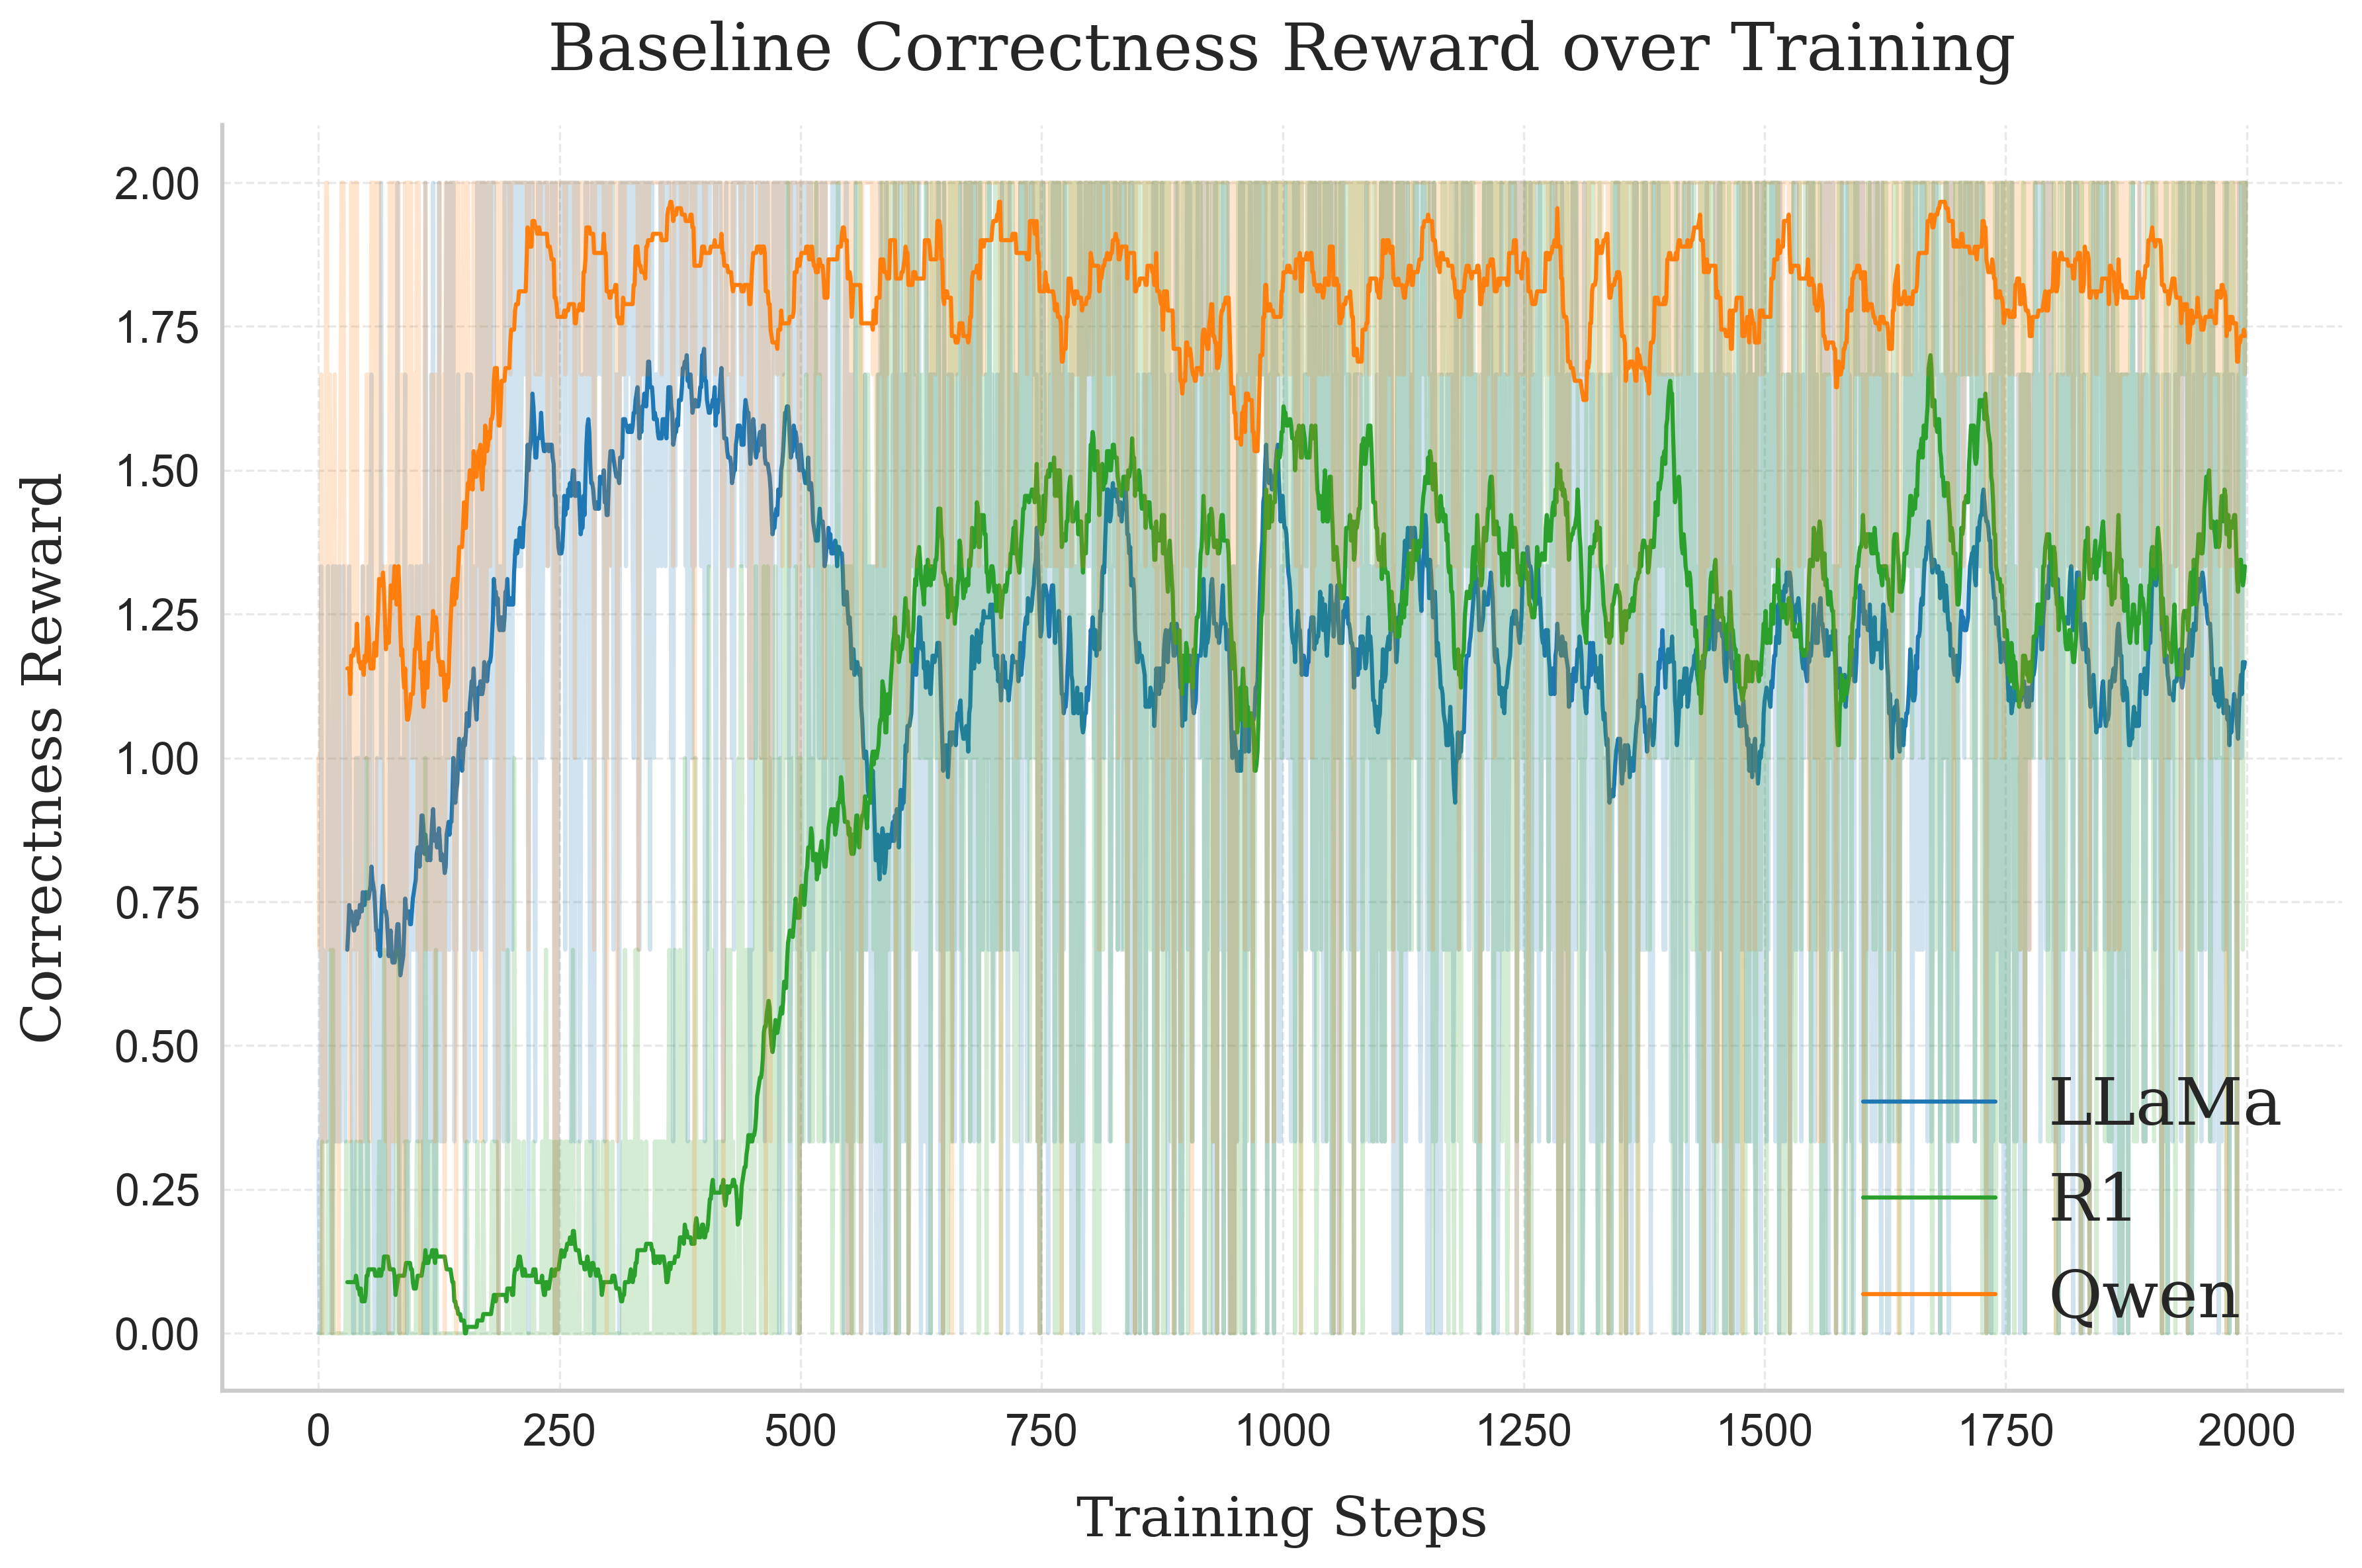

In [146]:
ax = plot_experiment(losses, 'Training Steps', 'Correctness Reward', "Baseline Correctness Reward over Training", smoothing = 30)
ax.legend(loc='lower right', fontsize=24)

In [147]:
import json
with open('llama_trainer_state.json') as f:
    llama_dict = json.load(f)
with open('r1_trainer_state.json') as f:
    r1_dict = json.load(f)
import json
with open('qwen_trainer_state.json') as f:
    qwen_dict = json.load(f)


plotting!


(-5.0, 10.0)

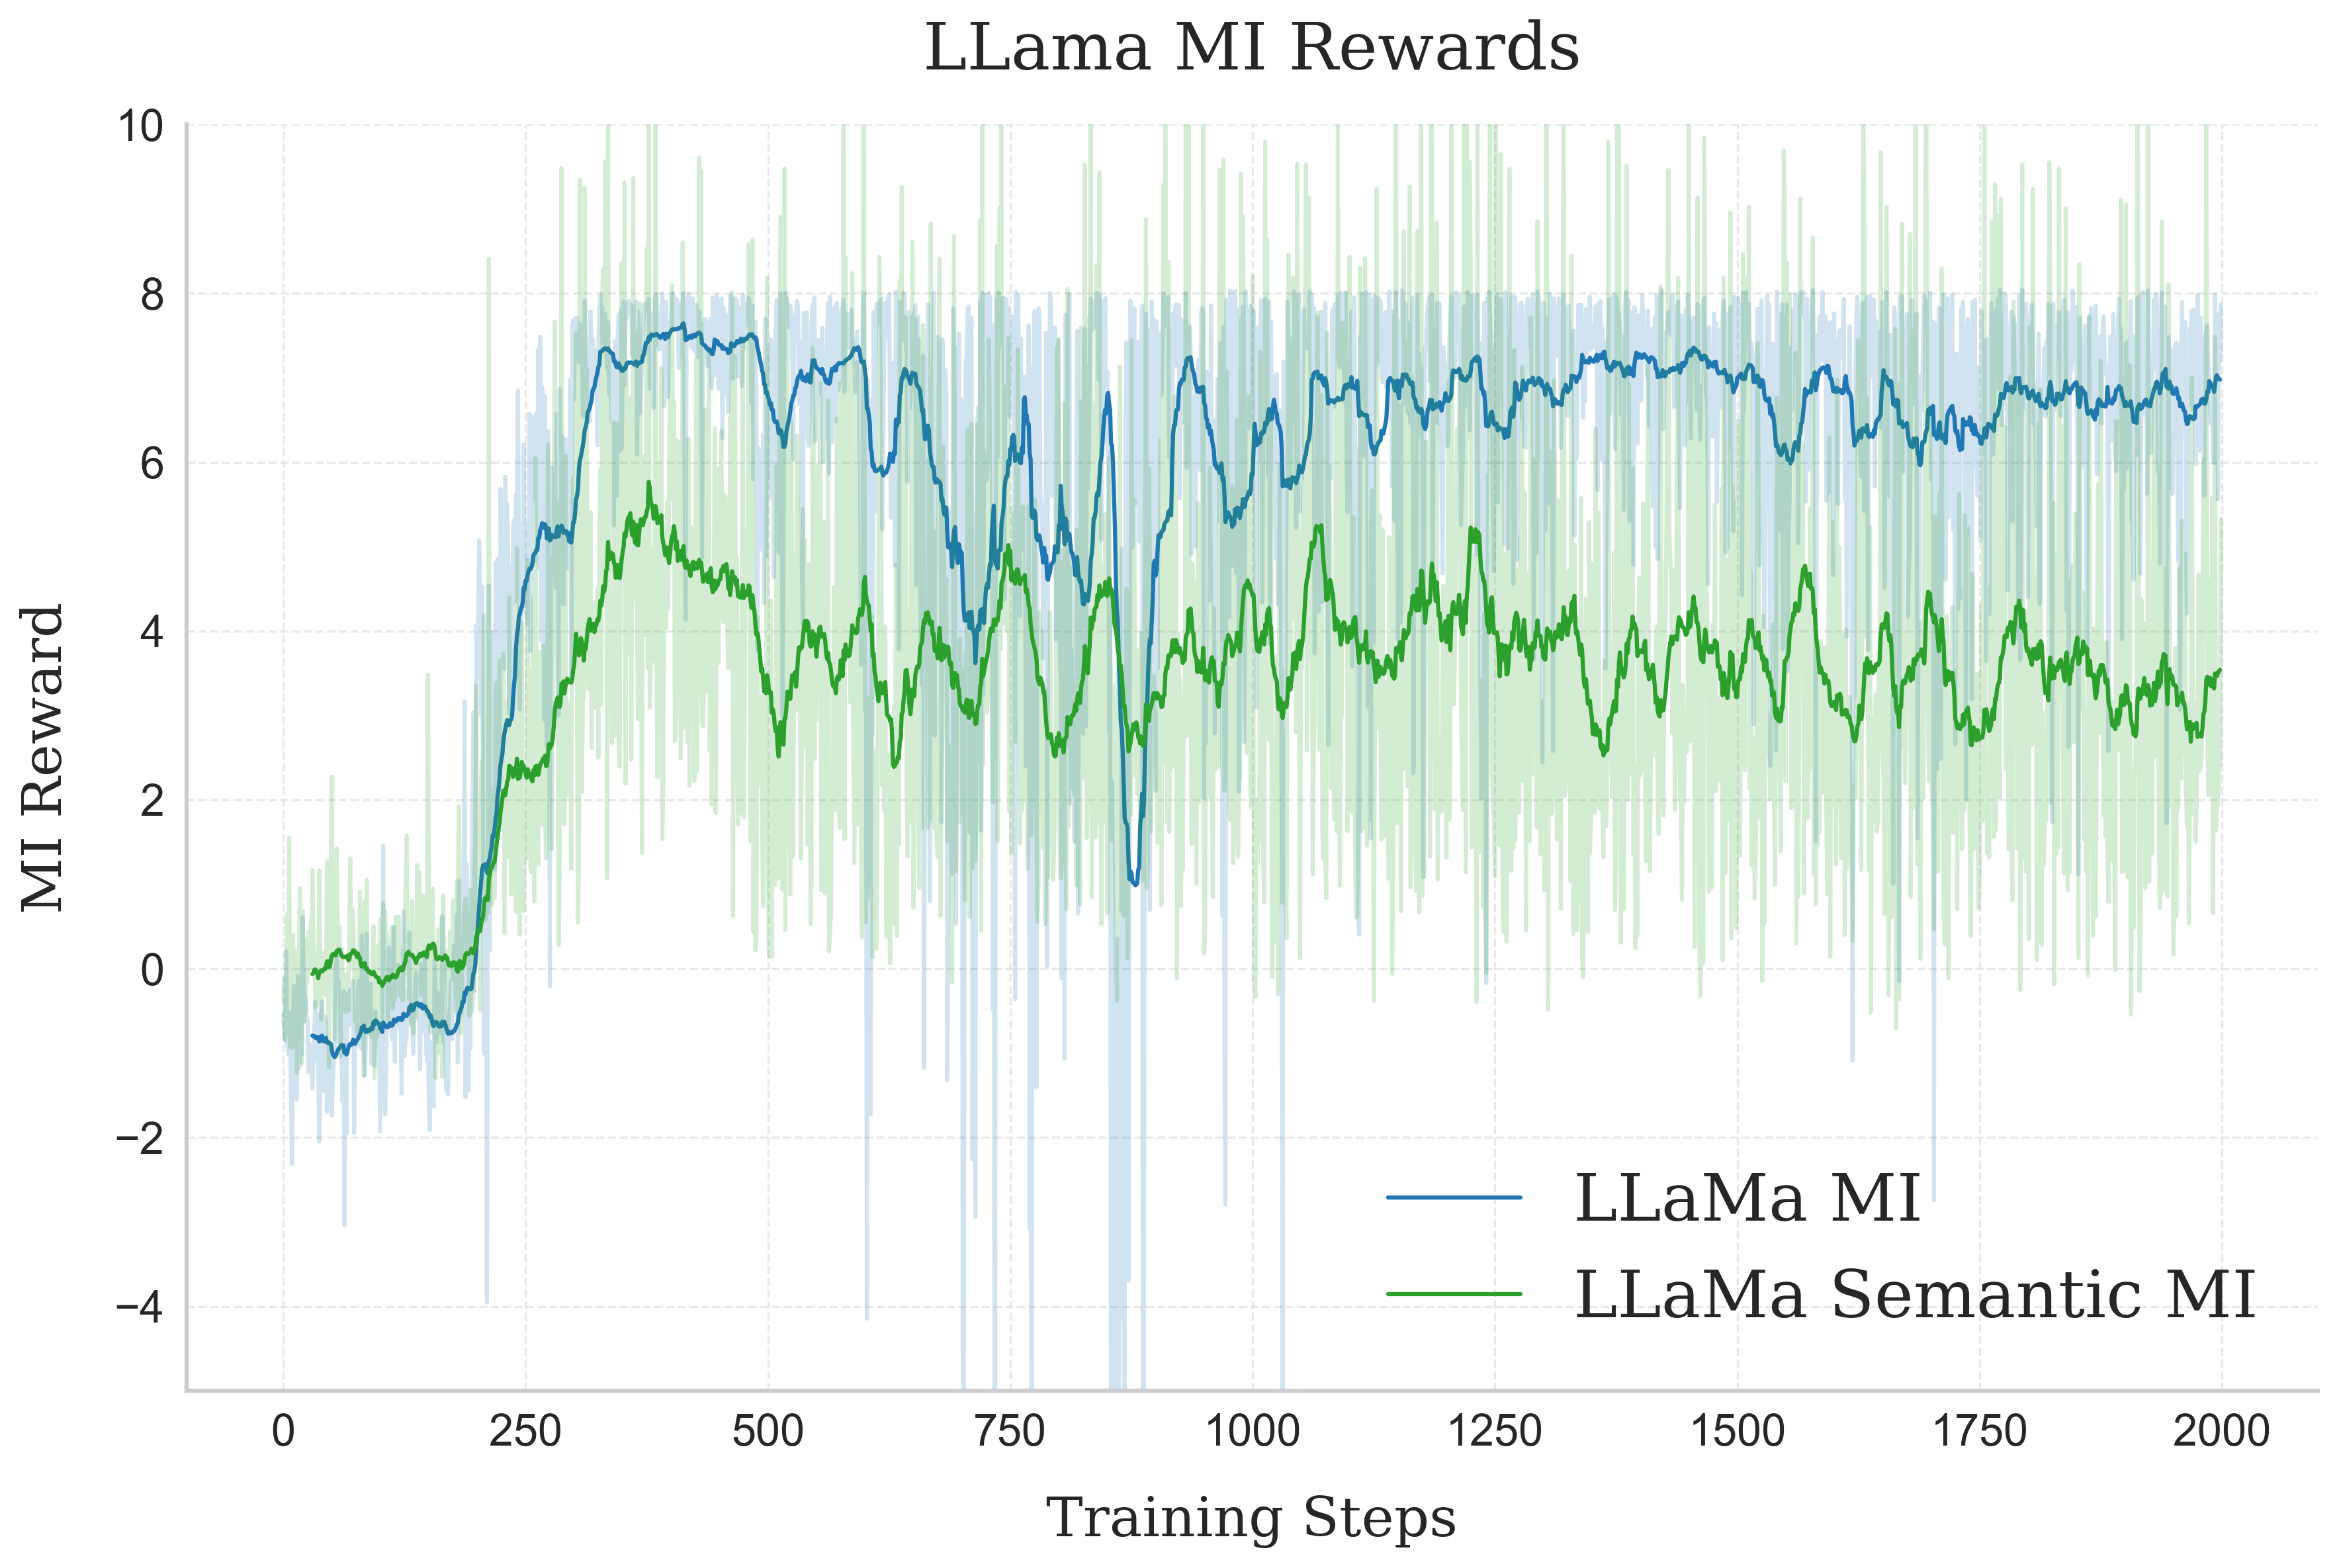

In [149]:
losses = {'LLaMa MI': get_mi(llama_dict),
          'LLaMa Semantic MI': get_smi(llama_dict)}

ax = plot_experiment(losses, 'Training Steps', 'MI Reward', "LLama MI Rewards", smoothing = 30)
ax.legend(loc='lower right', fontsize=24)
ax.set_ylim(-5, 10)

plotting!


(-2.0, 12.0)

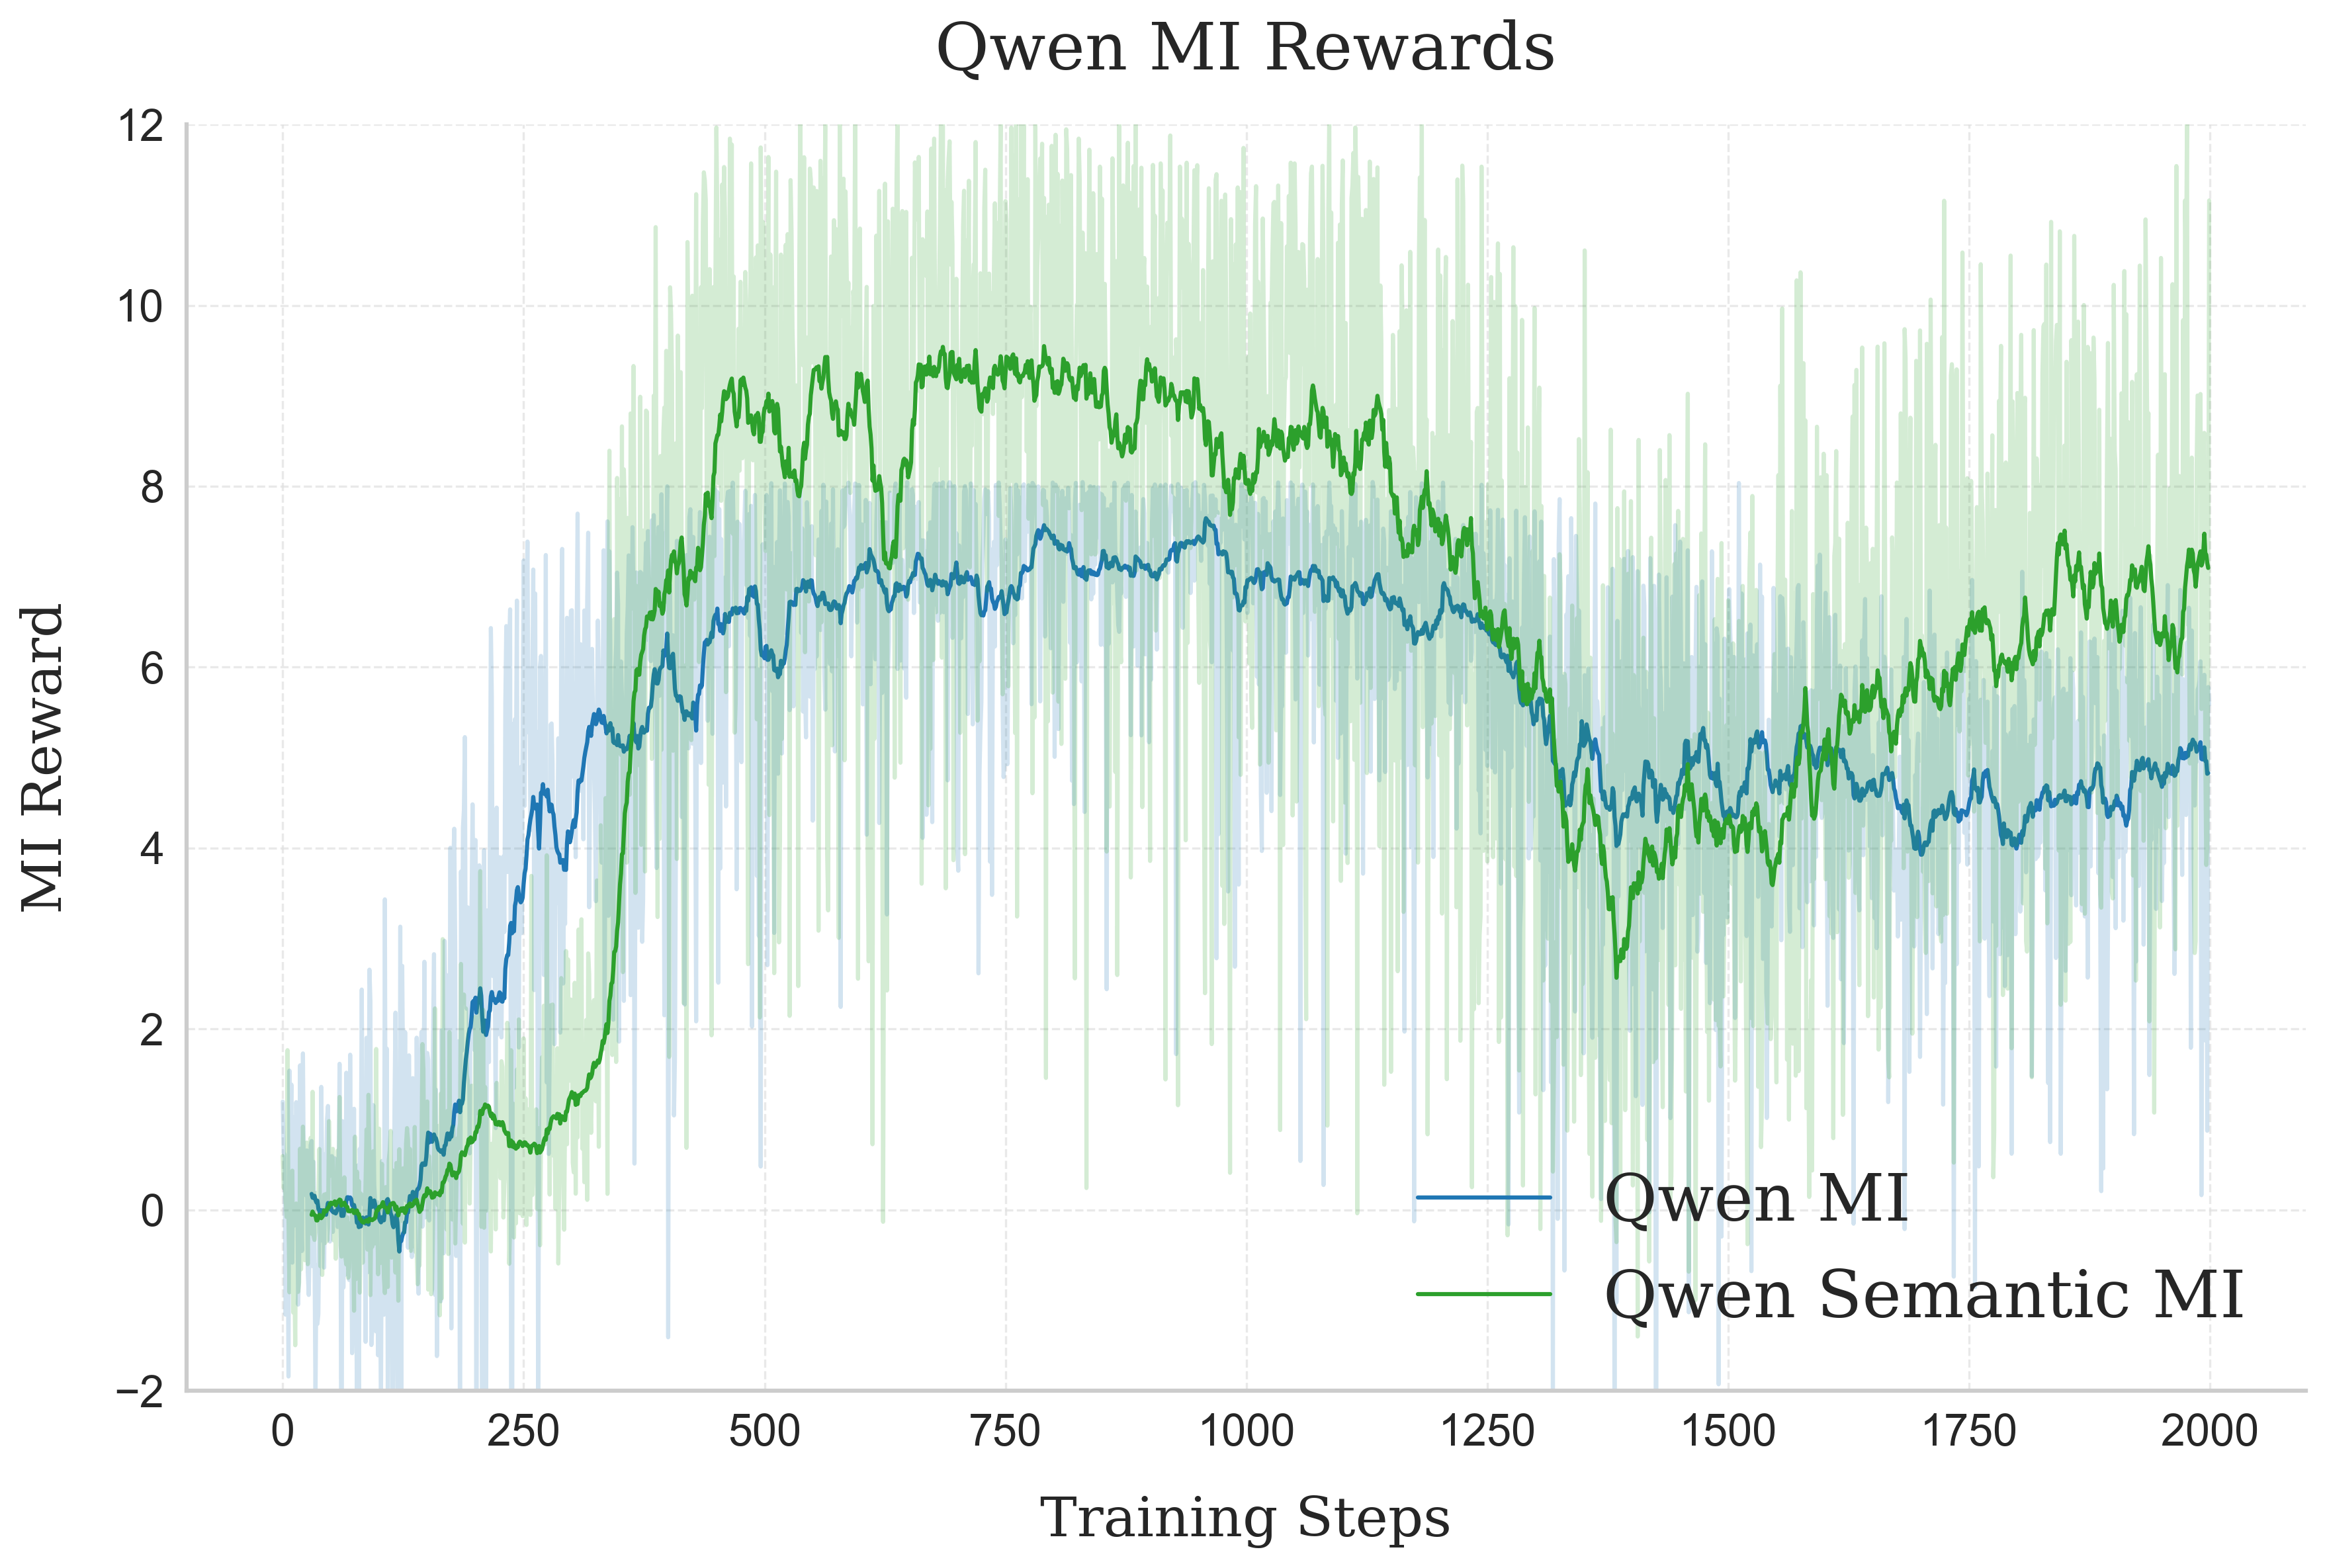

In [151]:
losses = {'Qwen MI': get_mi(qwen_dict),
          'Qwen Semantic MI': get_smi(qwen_dict)}

ax = plot_experiment(losses, 'Training Steps', 'MI Reward', "Qwen MI Rewards", smoothing = 30)
ax.legend(loc='lower right', fontsize=24)
ax.set_ylim(-2, 12)

plotting!


(-10.0, 10.0)

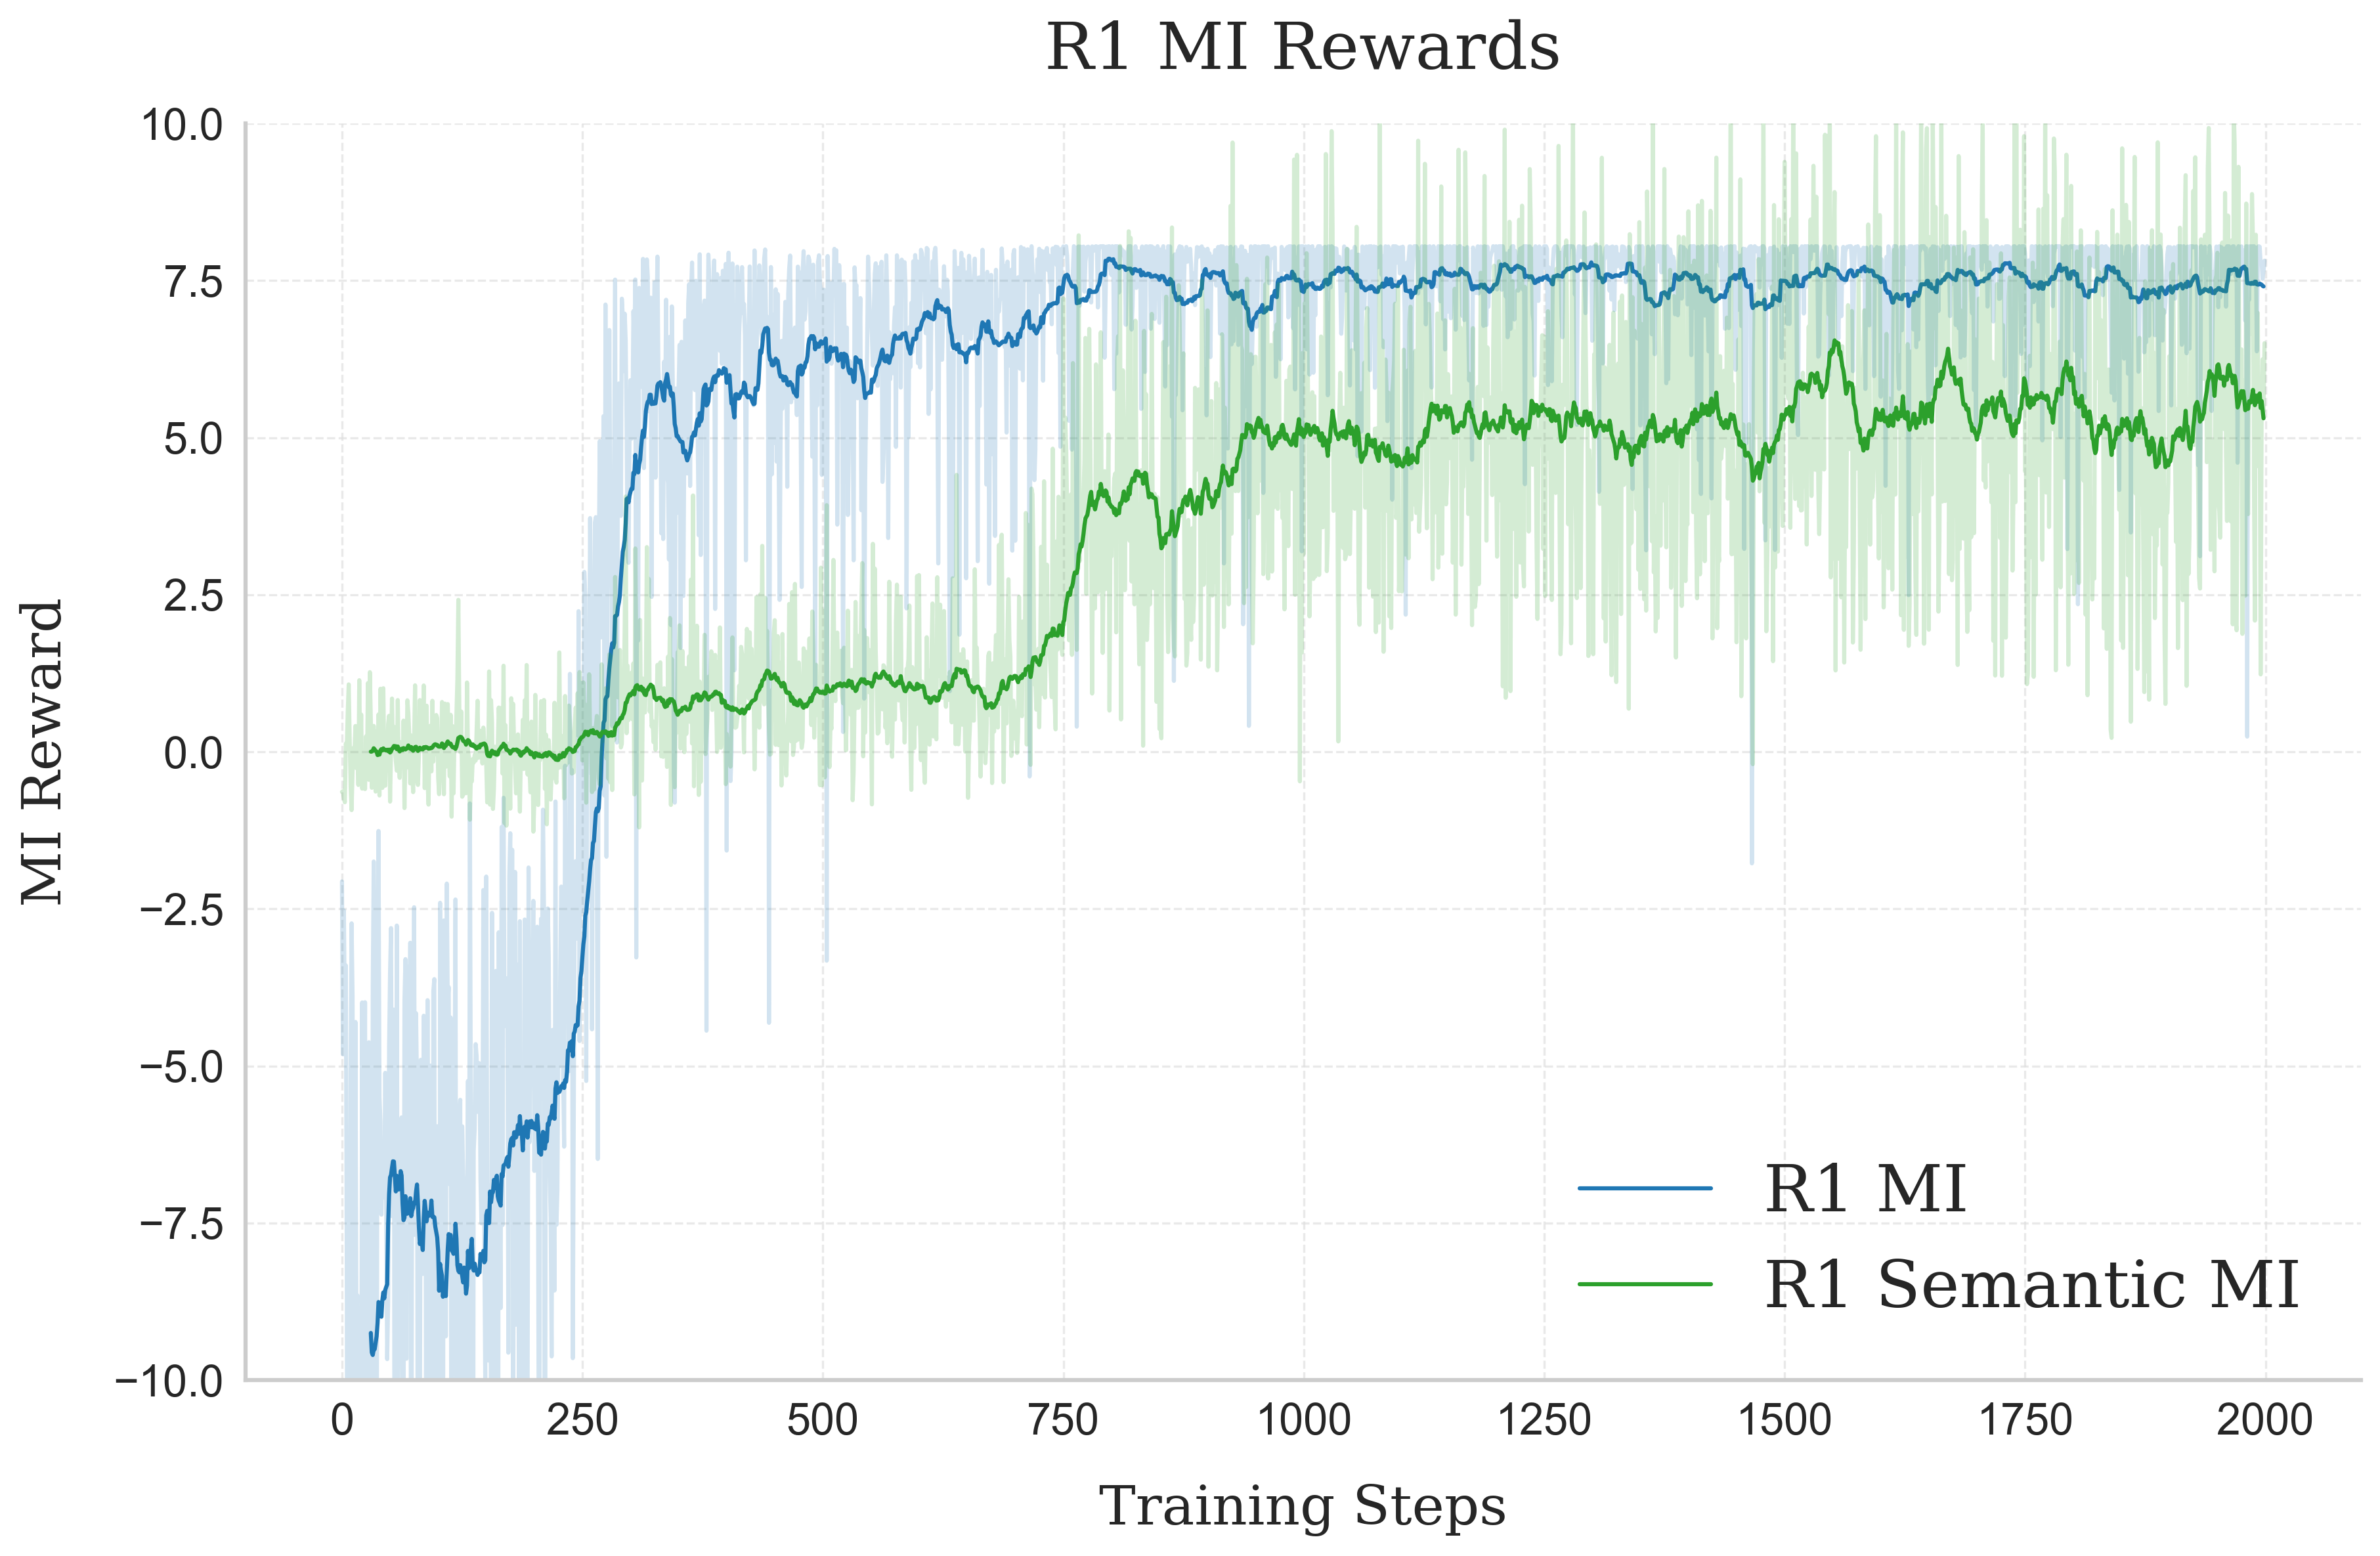

In [154]:
losses = {'R1 MI': get_mi(r1_dict),
          'R1 Semantic MI': get_smi(r1_dict)}

ax = plot_experiment(losses, 'Training Steps', 'MI Reward', "R1 MI Rewards", smoothing = 30)
ax.legend(loc='lower right', fontsize=24)
ax.set_ylim(-10, 10)

In [155]:
losses = {'LLaMa': get_rewards(llama_dict),
          'R1': get_rewards(r1_dict),
          'Qwen': get_rewards(qwen_dict)}

plotting!


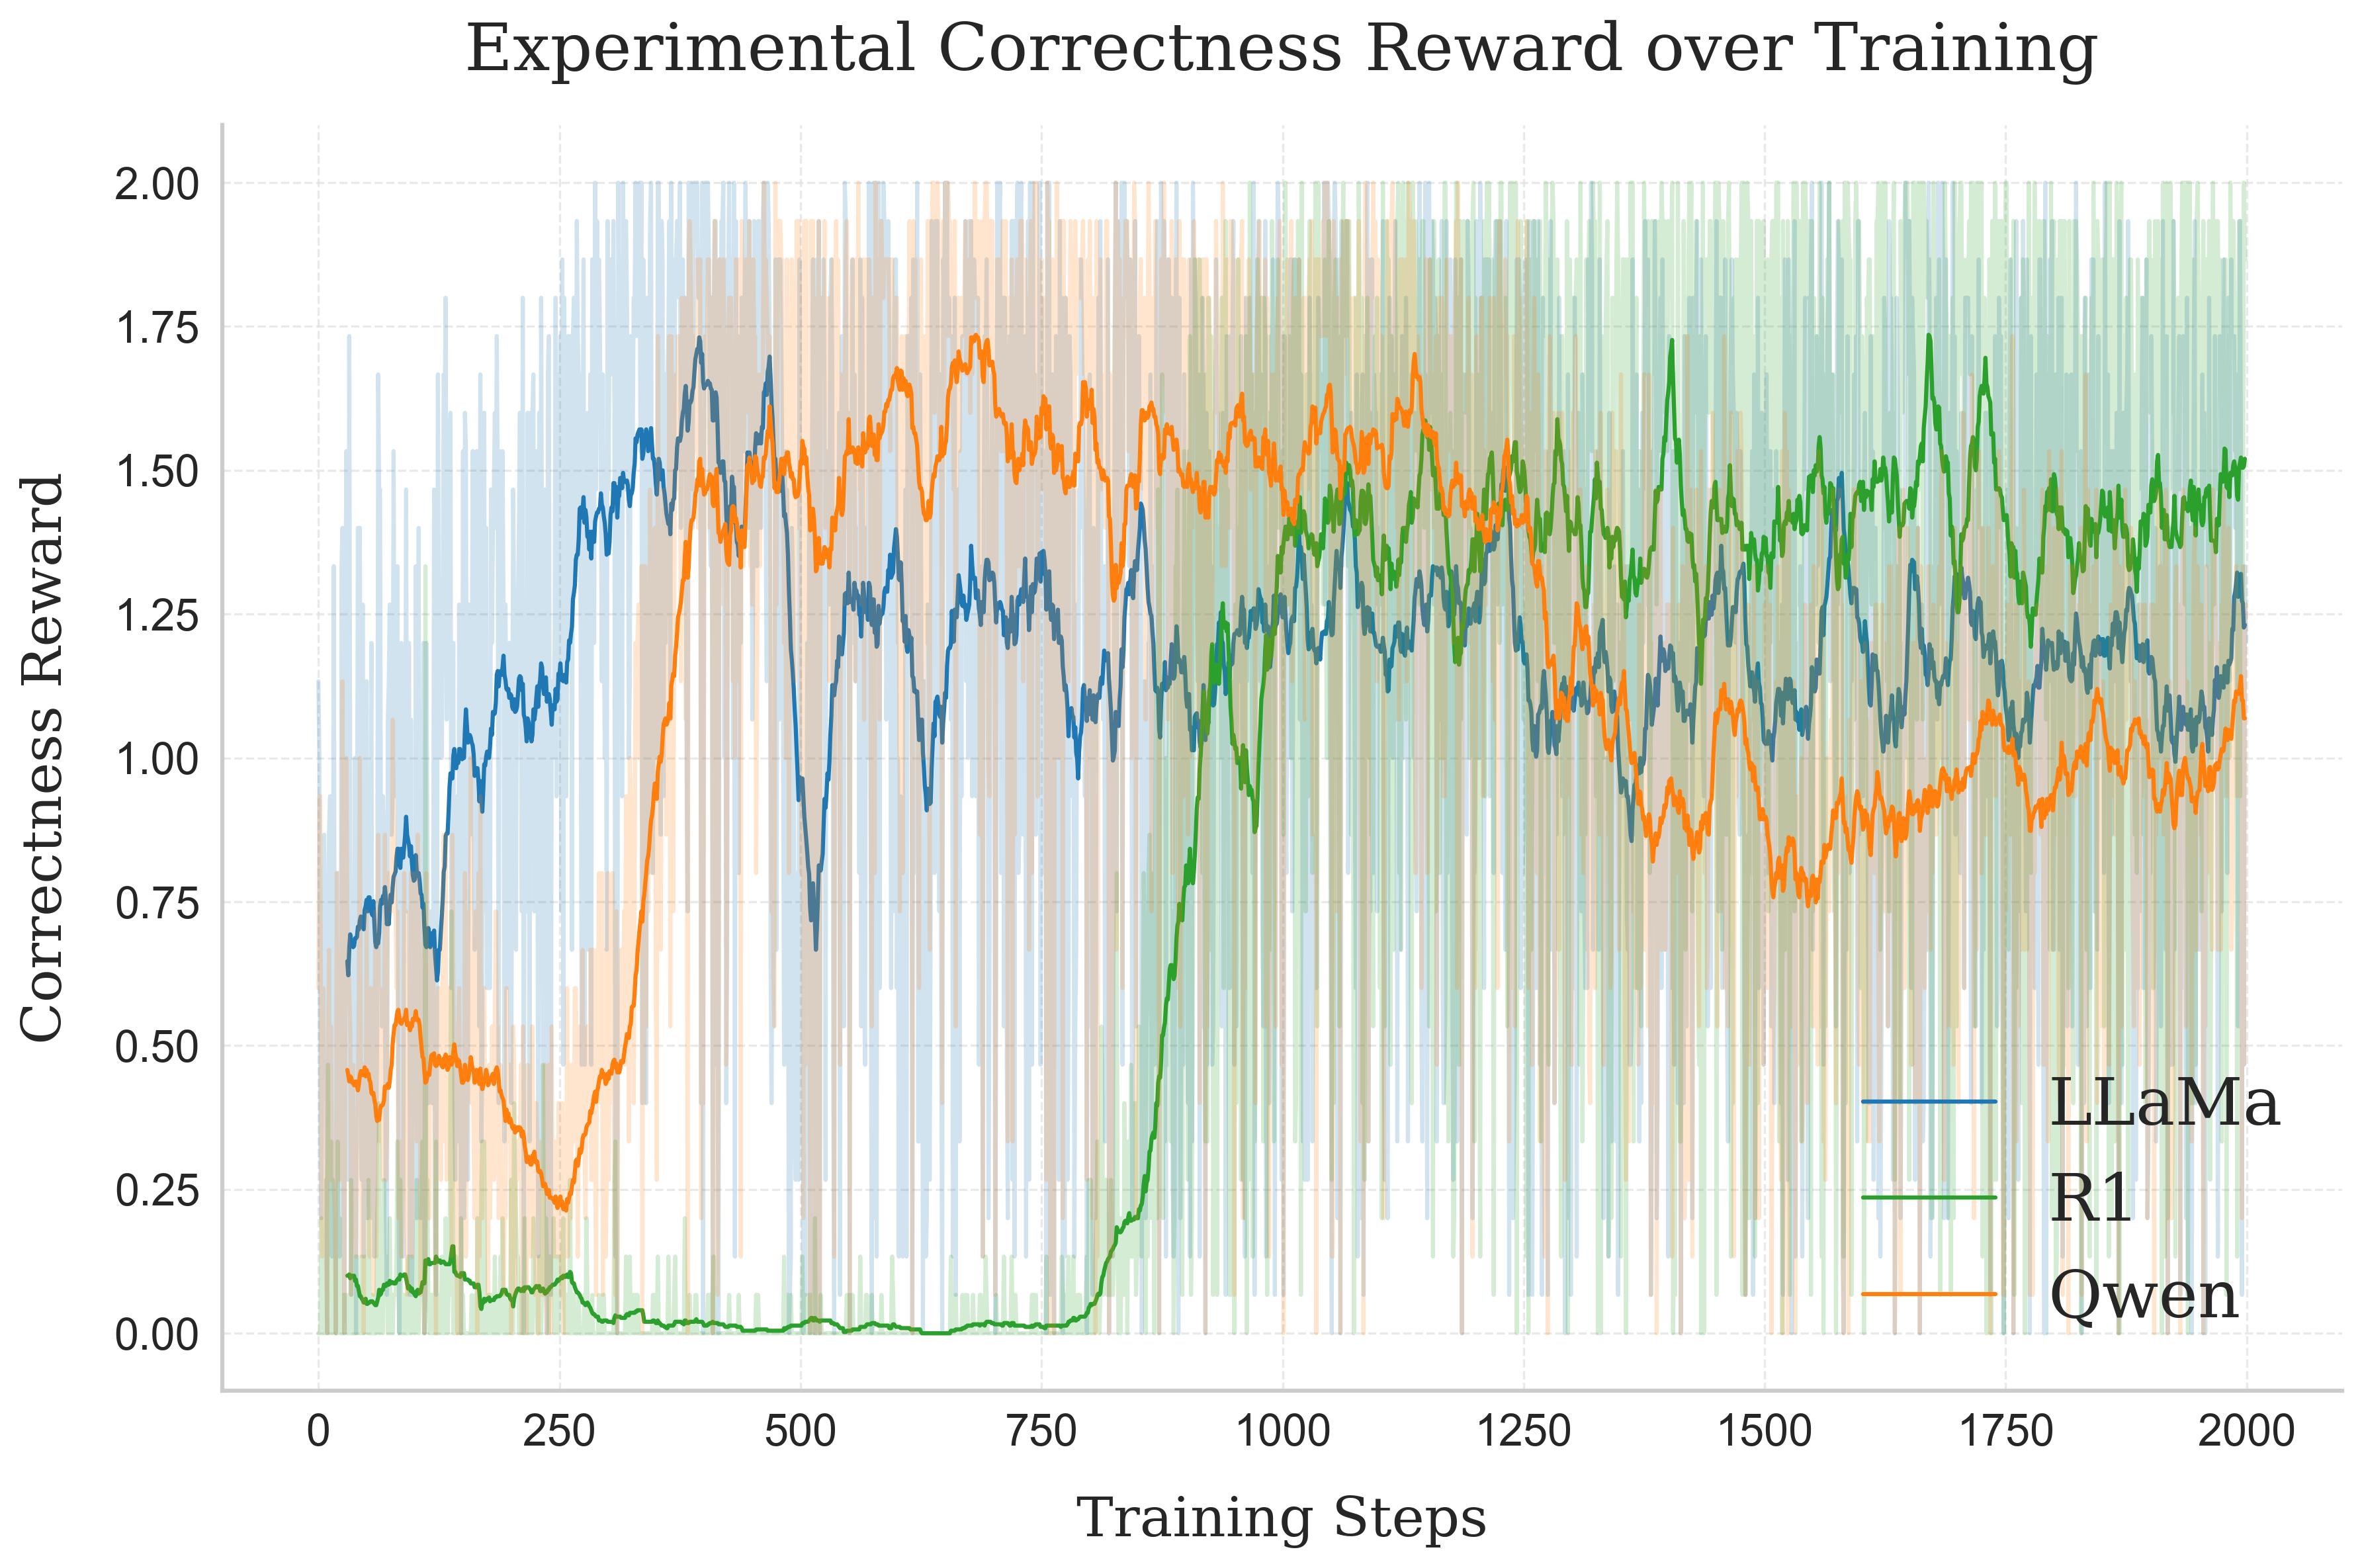

In [156]:
ax = plot_experiment(losses, 'Training Steps', 'Correctness Reward', "Experimental Correctness Reward over Training", smoothing = 30)
ax.legend(loc='lower right', fontsize=24)